Importer les bibliothèques

In [ ]:
# Importer les bibliothèques nécessaires
from tensorflow.keras.models import load_model
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IPython.display as ipd

Charger le modèle

In [ ]:
# Charger le modèle sauvegardé
saved_model_path = "modeles/saved_model.keras"
model = load_model(saved_model_path)

In [ ]:
# Fonction pour reconnaître l'espèce d'oiseau à partir d'un fichier audio
def recognize_bird(wave_file : str, model : tf.keras.Model, class_names : list) -> str:
    """"
    Reconnaître l'espèce d'oiseau à partir d'un fichier audio en utilisant un modèle pré-entraîné.

    Paramètres :
    wave_file (str) : Chemin vers le fichier audio.
    model (tf.keras.Model) : Modèle pré-entraîné pour la reconnaissance des espèces d'oiseaux.
    class_names (list) : Liste des noms d'espèces d'oiseaux correspondant aux classes de sortie du modèle.
    """
    # Charger le fichier audio
    audio_data, sample_rate = librosa.load(wave_file, duration=3)
    
    # Générer un spectrogramme Mel
    mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    
    # Ajouter une dimension pour correspondre à la forme d'entrée du modèle
    mel_spec = tf.expand_dims(mel_spec, axis=0)
    
    # Prédire l'espèce d'oiseau
    prediction = model.predict(mel_spec)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Retourner l'espèce d'oiseau prédite
    return class_names[predicted_class]

Charger les noms des oiseaux

In [ ]:
# Charger les métadonnées et extraire les noms des espèces d'oiseaux
df = pd.read_csv("ouiseau/bird_songs_metadata.csv")
class_names = df["name"].unique()

# Afficher les 10 premiers noms d'espèces d'oiseaux
print("Noms des espèces d'oiseaux :")
for i, name in enumerate(class_names[:10]):
    print(f"{i + 1}: {name}")

print(class_names)

Bird species names:
1: Bewick's Wren
2: Northern Mockingbird
3: American Robin
4: Song Sparrow
5: Northern Cardinal
["Bewick's Wren" 'Northern Mockingbird' 'American Robin' 'Song Sparrow'
 'Northern Cardinal']


Utiliser le modèle

In [ ]:
# Utiliser le modèle pour prédire l'espèce d'oiseau
wave_file = 'sons_test/northern_cardinal.wav'  # Remplacer par le chemin vers votre fichier audio
predicted_bird = recognize_bird(wave_file, model, class_names)
print(f"L'espèce d'oiseau prédite est : {predicted_bird}")

# Récupérer le nom réel de l'oiseau à partir des métadonnées en utilisant le nom du fichier
# actual_bird = df[df["filename"] == wave_file.split("/")[-1]]["name"].values[0]
# print(f"L'espèce d'oiseau réelle est : {actual_bird}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
The predicted bird species is: Song Sparrow


Écouter l'entrée

In [ ]:
# Charger et écouter le fichier audio d'entrée
audio_data, sample_rate = librosa.load(wave_file, sr=None)  # Charger le fichier audio
ipd.Audio(audio_data, rate=sample_rate)

Écouter un son aléatoire de cet oiseau dans la base de données

In [ ]:
def listen_to_random_bird(predicted_bird, df):
    """
    Écouter un son aléatoire de l'espèce d'oiseau prédite.

    Paramètres :
    predicted_bird (str) : L'espèce d'oiseau prédite.
    df (pd.DataFrame) : DataFrame contenant les métadonnées des sons d'oiseaux.
    """
    # Filtrer le DataFrame pour l'espèce d'oiseau prédite
    filtered_df = df[df["name"] == predicted_bird]
    
    # Sélectionner aléatoirement un son dans le DataFrame filtré
    random_song = filtered_df.sample(1).iloc[0]
    
    # Charger et jouer le fichier audio
    audio_data, sample_rate = librosa.load(f"ouiseau/wavfiles/{random_song['filename']}", sr=None)
    return ipd.Audio(audio_data, rate=sample_rate)

# Écouter un son aléatoire de l'espèce d'oiseau prédite
listen_to_random_bird(predicted_bird, df)

Image de l'oiseau prédit

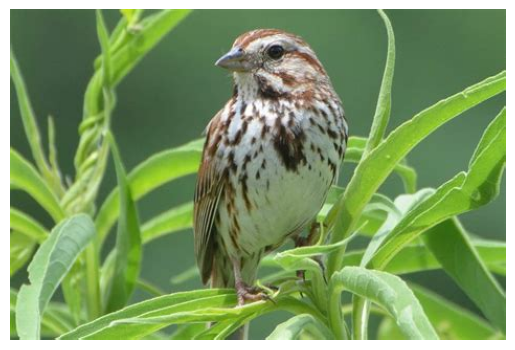

In [ ]:
# Afficher une image de l'espèce d'oiseau prédite
picture_path = predicted_bird.replace(" ", "_")

img = imread(f"oiso/{picture_path}.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()